# Case study: Ordinary Brownian Motion Simulation of Daily Price Return

In [38]:
# import Pkg;
# Pkg.add("Distributions"); # add the Distributions package (if not already installed)
# Pkg.add("Plots");         # add the Plots package (if not already installed)

# using statements -
using Distributions;
using Plots;

In [23]:
# setup conditions for the simulation -

# model parameters -
μ = 0.01;   # drift term
σ = 0.10;   # volatility 
Xₒ = 0.64;  # initial condition

# time -
tₒ = 0.0;   # initial time units: days
t₁ = 45.0;  # final time units: days
h = 0.154;  # step size units: days

# paths -
P = 100;    # number of sample paths

In [39]:
function simulate(μ::Float64, σ::Float64, tₒ::Float64, t₁::Float64, h::Float64, Xₒ::Float64, P::Int64)
    
    # initialize -
    T = range(tₒ, stop=t₁, step = h) |> collect
    S = range(1, stop = P, step = 1) |> collect
    X = zeros(length(T), P)
    
    # set the initial condition -
    X[1,1:P] .= Xₒ
    
    # make a 𝒩 model -
    𝒩 = Normal(0,1)
    
    # main loop -
    for (k,s) ∈ enumerate(S)
        for i ∈ 1:(length(T) - 1)
            Z = rand(𝒩)
            X[i+1,k] = X[i,k] + μ*h + σ*(√h)*Z 
        end
    end

    # return -
    return (T,X)
end

simulate (generic function with 1 method)

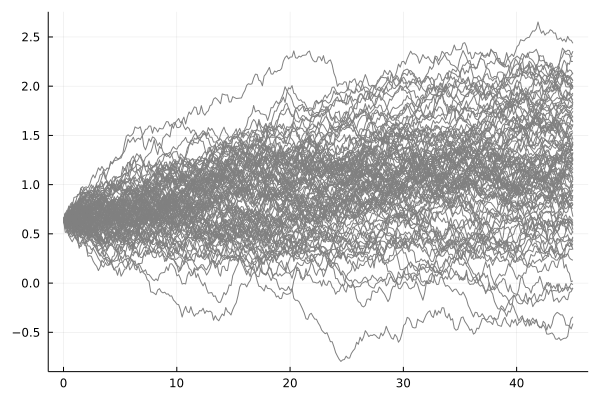

In [37]:
(T,X) = simulate(μ, σ, tₒ, t₁, h, Xₒ, P);
plot(T,X, legend=false, c=:gray)